In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

fetched_repo =  fetch_ucirepo(id = 697)
X = fetched_repo.data.features
y = fetched_repo.data.targets
m = fetched_repo.variables
df = pd.DataFrame(X).infer_objects()
df_m = pd.DataFrame(m).infer_objects()
df['Target'] = y
#https://github.com/carmelh/SQL_projects/tree/main/student_data_analysis/Datasets

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

df_m["x"] = df_m.groupby("name").cumcount() + 1

def split_description(description):
    pattern = r"(\d+)\s*[-–]\s*([^0-9]+)"
    matches = re.findall(pattern, description)
    return dict(matches)

df_m["description_split"] = df_m["description"].apply(split_description)
df_expanded = pd.json_normalize(df_m["description_split"])
df_expanded['name'] = df_m['name']
df_expanded = df_expanded.set_index('name')
df_expanded = df_expanded.reset_index()


def get_value(category, index):
    return df_expanded.get(category, {}).get(str(index), None)
print(get_value("Marital Status", 1))


None


In [3]:
stats = pd.DataFrame()
numeric_features = df.select_dtypes(include='number').columns

stats['Mean'] = df[numeric_features].mean()
stats['Median'] = df[numeric_features].median()
stats['Min'] = df[numeric_features].min()
stats['Max'] = df[numeric_features].max()
stats['Std'] = df[numeric_features].std()
stats['5th Percentile'] = df[numeric_features].quantile(0.05)
stats['95th Percentile'] = df[numeric_features].quantile(0.95)
stats['Missing Values'] = df[numeric_features].isnull().sum()
stats['Unique'] = df[numeric_features].nunique()

stats.to_csv('output/numeric_statistics.csv', sep=';')
print(stats)

                                                       Mean       Median  \
Marital Status                                     1.178571     1.000000   
Application mode                                  18.669078    17.000000   
Application order                                  1.727848     1.000000   
Course                                          8856.642631  9238.000000   
Daytime/evening attendance                         0.890823     1.000000   
Previous qualification                             4.577758     1.000000   
Previous qualification (grade)                   132.613314   133.100000   
Nacionality                                        1.873192     1.000000   
Mother's qualification                            19.561935    19.000000   
Father's qualification                            22.275316    19.000000   
Mother's occupation                               10.960895     5.000000   
Father's occupation                               11.032324     7.000000   
Admission gr

In [4]:
cat_features = df.select_dtypes(include='object').columns
cat_stats = []

for col in cat_features:
    top_classes = df[col].value_counts(normalize=True).to_dict()
    cat_stats.append({
        'Feature': col,
        'Unique Classes': df[col].nunique(),
        'Missing Values': df[col].isnull().sum(),
        f'Class Proportions': top_classes
    })

pd.DataFrame(cat_stats).to_csv('output/categorical_statistics.csv', sep=';', index=False)
print(cat_stats)

[{'Feature': 'Target', 'Unique Classes': 3, 'Missing Values': np.int64(0), 'Class Proportions': {'Graduate': 0.4993218806509946, 'Dropout': 0.3212025316455696, 'Enrolled': 0.1794755877034358}}]


0: 34 – Unknown
1: 35 – Can't read or write
2: 36 – Can read without having a 4th year of schooling
3: 37 – Basic education 1st cycle (4th/5th year) or equiv.
4: 26 – 7th year of schooling
5: 11 – 7th Year (Old)
6: 30 – 8th year of schooling
7: 29 – 9th Year of Schooling - Not Completed
8: 14 – 10th Year of Schooling
9: 10 – 11th Year of Schooling - Not Completed
10: 12 – Other - 11th Year of Schooling
11: 13 – 2nd year complementary high school course
12: 20 – Complementary High School Course
13: 25 – Complementary High School Course - not concluded
14: 18 – General commerce course
15: 31 – General Course of Administration and Commerce
16: 33 – Supplementary Accounting and Administration
17: 27 – 2nd cycle of the general high school course
18: 38 – Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
19: 19 – Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
20: 9 – 12th Year of Schooling - Not Completed
21: 1 – Secondary Education - 12th Year of Schooling or Eq.
22: 22 – Technical-professional course
23: 6 – Frequency of Higher Education
24: 39 – Technological specialization course
25: 40 – Higher education - degree (1st cycle)
26: 2 – Higher Education - Bachelor's Degree
27: 3 – Higher Education - Degree
28: 41 – Specialized higher studies course
29: 42 – Professional higher technical course
30: 4 – Higher Education - Master's
31: 43 – Higher Education - Master (2nd cycle)
32: 5 – Higher Education - Doctorate
33: 44 – Higher Education - Doctorate (3rd cycle)

In [5]:
education_mapping = {
     34:0, 35: 1, 36: 2, 37: 3, 26: 4, 11: 5, 30: 6, 29: 7, 14: 8, 10: 9, 12: 10, 13: 11, 20: 12, 25: 13, 18: 14, 31: 15, 33: 16, 27: 17, 38: 18, 19: 19, 9: 20, 1: 21, 22: 22, 6: 23, 39: 24, 40: 25, 2: 26, 3: 27, 41: 28, 42: 29, 4: 30, 43: 31, 5: 32, 44: 33}

df["Mother's qualification level"] = df["Mother's qualification"].map(education_mapping)
df["Father's qualification level"] = df["Father's qualification"].map(education_mapping)

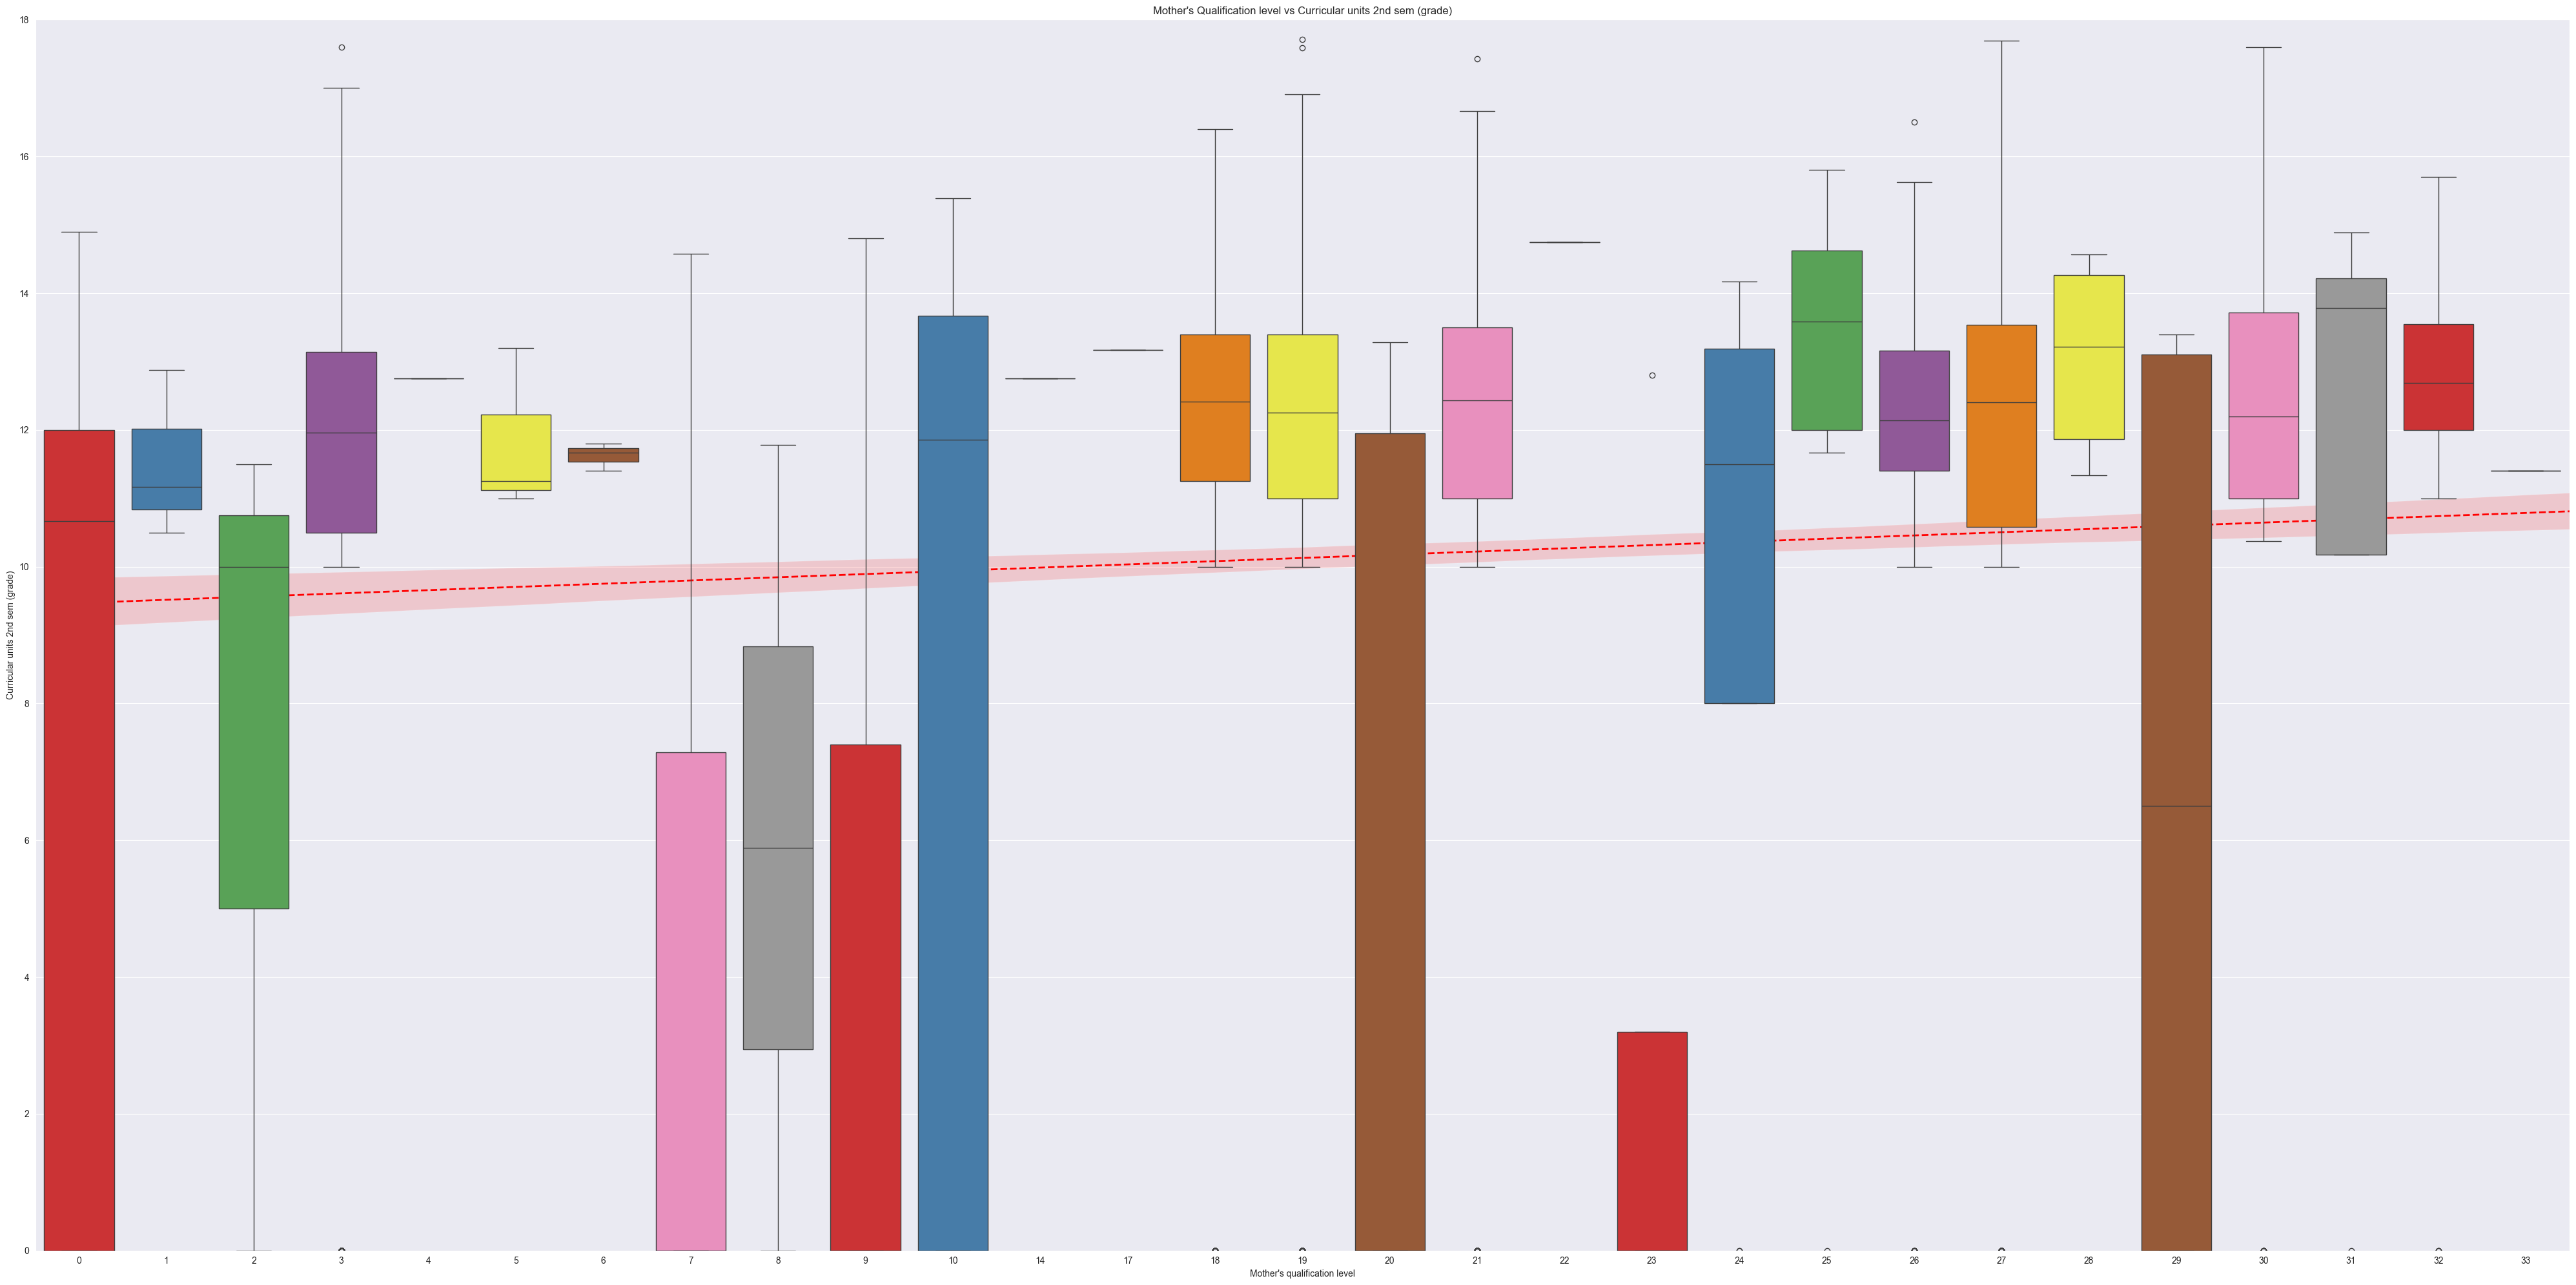

In [6]:
plt.figure(figsize=(40, 20))

sns.regplot(x="Mother's qualification level", y='Curricular units 2nd sem (grade)', data=df, scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

sns.boxplot(x="Mother's qualification level", y='Curricular units 2nd sem (grade)', data=df, palette='Set1', hue="Mother's qualification level", legend=False)

plt.title("Mother's Qualification level vs Curricular units 2nd sem (grade)")
plt.ylim(0,18)
plt.tight_layout()
plt.show()


In [20]:
def categorize_qualification(qualification):
    if qualification in [1, 9, 10, 14]:
        return 'Secondary Education (Completed/Incomplete)'
    elif qualification in [2, 3, 4, 5]:
        return 'Higher Education (Bachelor/Master/Doctorate)'
    elif qualification == 6:
        return 'Frequency of Higher Education'
    elif qualification == 18:
        return 'General Commerce Course'
    elif qualification == 19:
        return 'Basic Education 3rd Cycle'
    elif qualification == 22:
        return 'Technical-professional Course'
    elif qualification in [26, 27, 30]:
        return '7th/8th Year of Schooling'
    elif qualification == 34:
        return 'Unknown'
    elif qualification == 35:
        return 'Can\'t Read or Write'
    elif qualification == 36:
        return 'Can Read Without Completing 4th Year'
    elif qualification == 37:
        return 'Basic Education 1st Cycle'
    elif qualification == 38:
        return 'Basic Education 2nd Cycle'
    elif qualification in [39, 40, 41, 42, 43, 44]:
        return 'Higher Education (Specialized/Professional)'
    else:
        return 'Other'

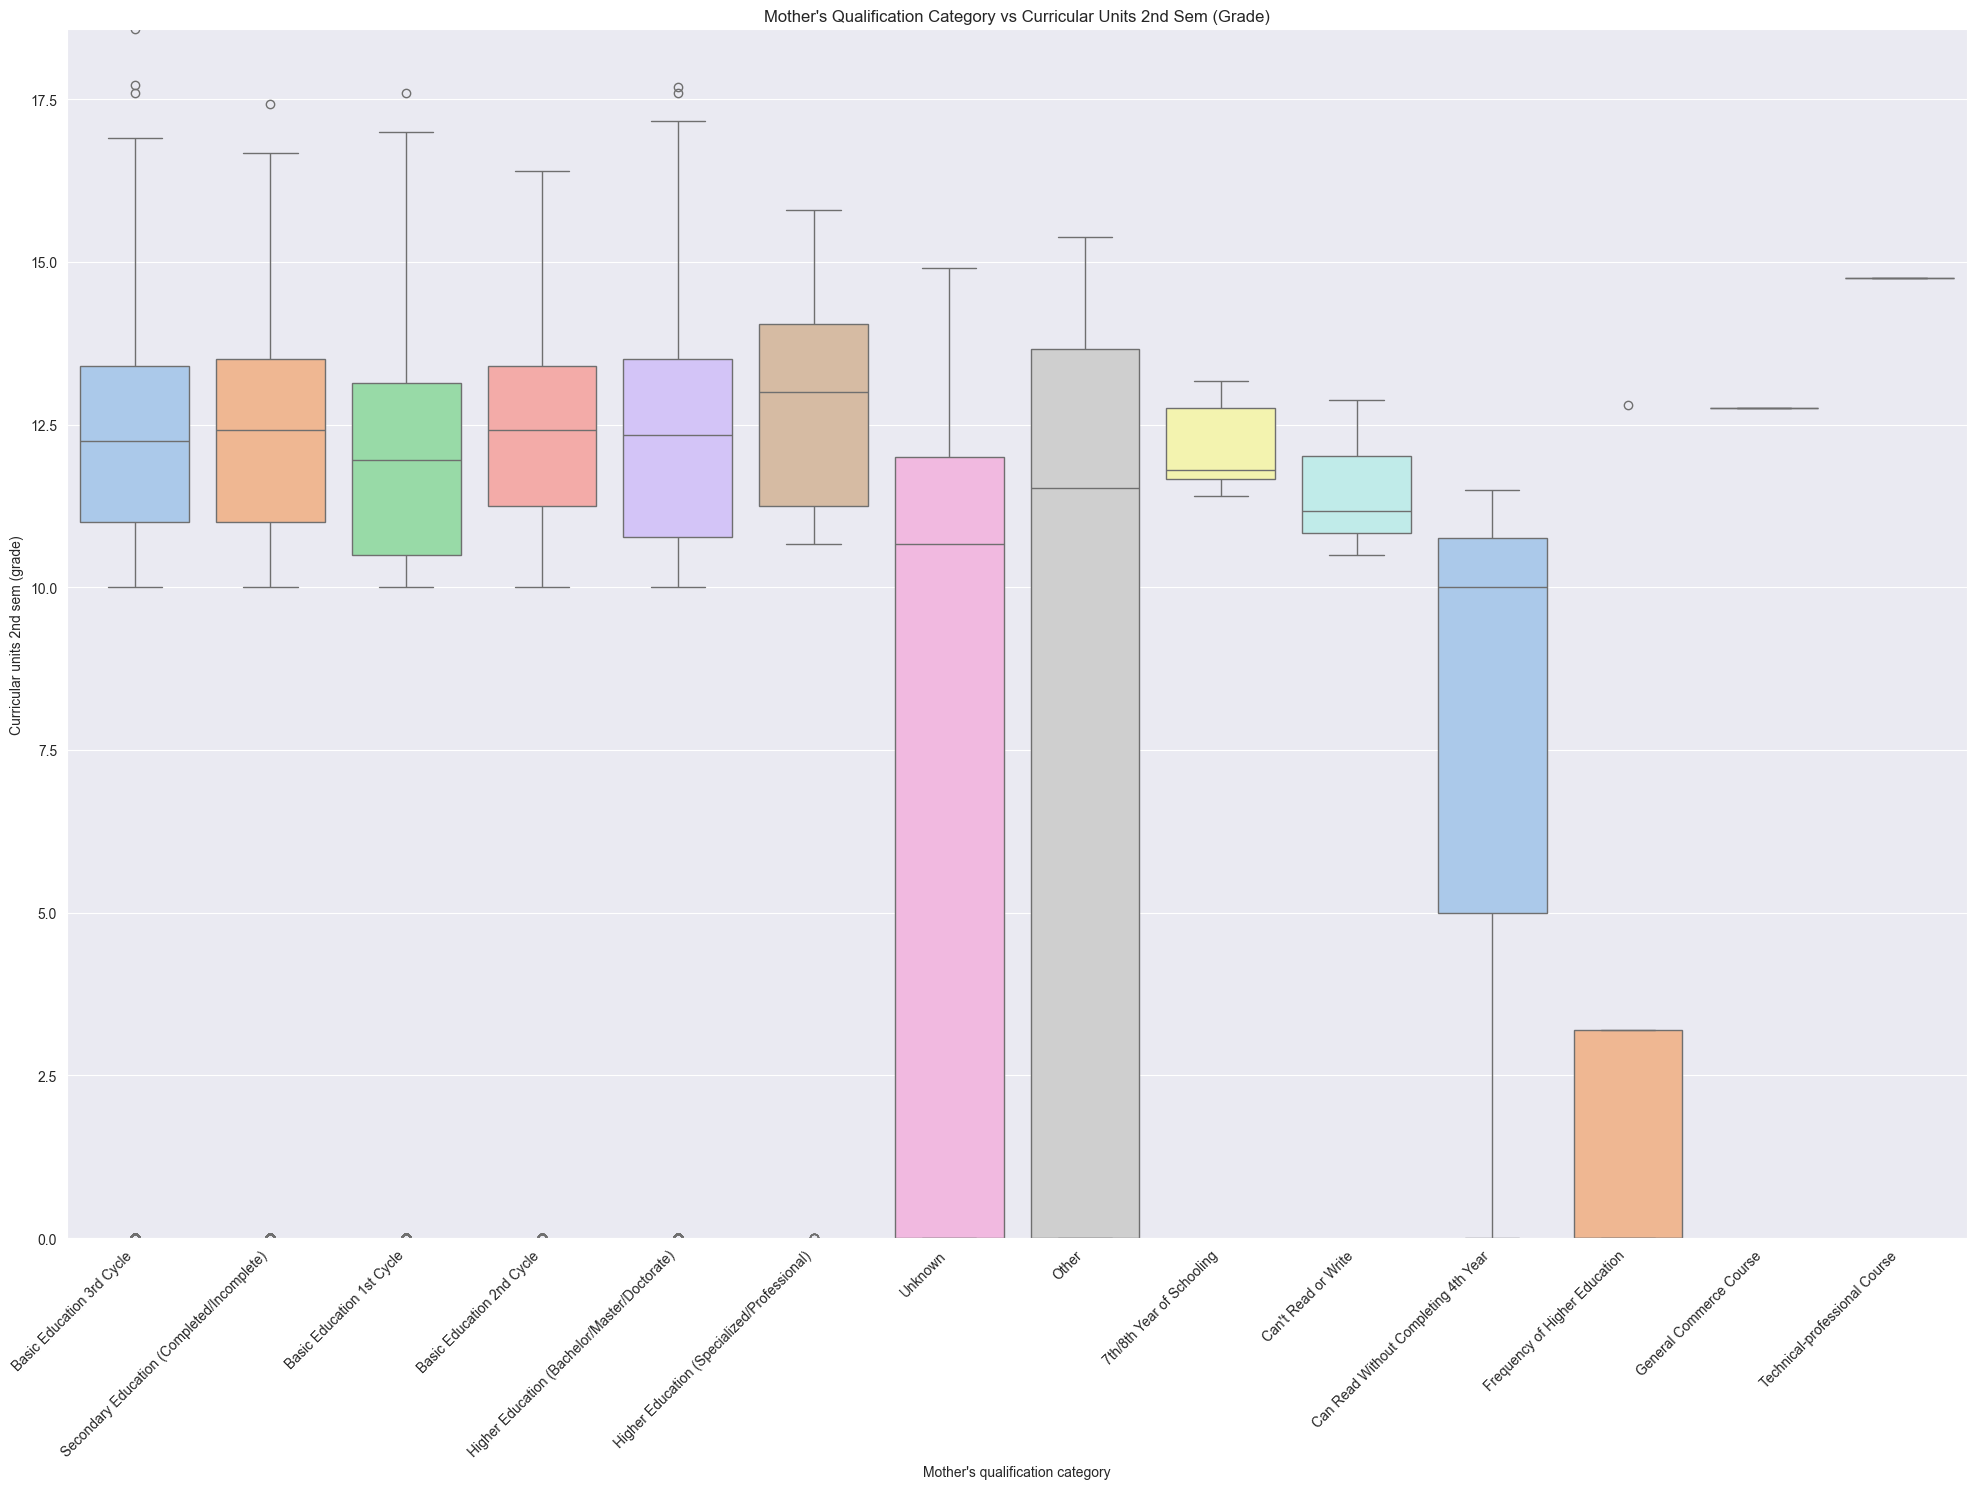

In [8]:
df['Mother\'s qualification category'] = df['Mother\'s qualification'].apply(categorize_qualification)

plt.figure(figsize=(20, 15))
sns.boxplot(x='Mother\'s qualification category', y='Curricular units 2nd sem (grade)', data=df, palette='pastel', hue='Mother\'s qualification category', legend=False)
plt.title("Mother's Qualification Category vs Curricular Units 2nd Sem (Grade)")
plt.xticks(rotation=45, ha="right")
plt.ylim(df["Curricular units 2nd sem (grade)"].min(), df["Curricular units 2nd sem (grade)"].max())

plt.tight_layout()
plt.show()


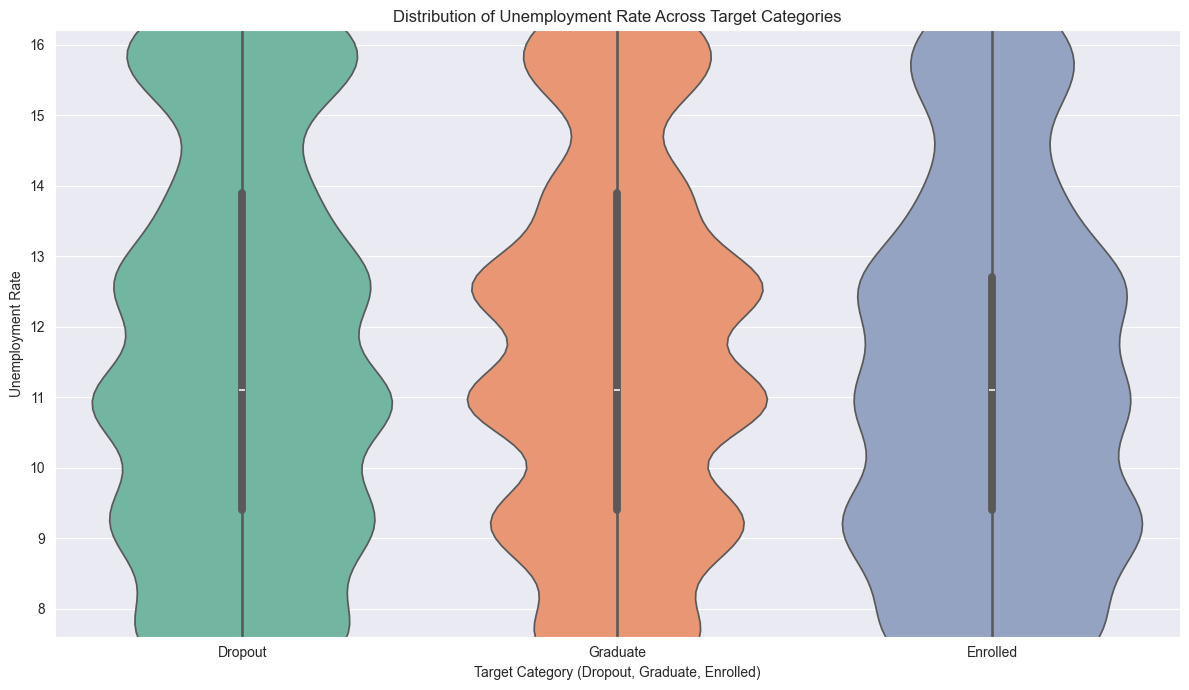

In [9]:
plt.figure(figsize=(12, 7))
sns.violinplot(x="Target", y="Unemployment rate", data=df, palette="Set2", dodge=False, hue="Target")
plt.title("Distribution of Unemployment Rate Across Target Categories")
plt.xlabel("Target Category (Dropout, Graduate, Enrolled)")
plt.ylabel("Unemployment Rate")

plt.ylim(df["Unemployment rate"].min(), df["Unemployment rate"].max())
plt.tight_layout()
plt.show()


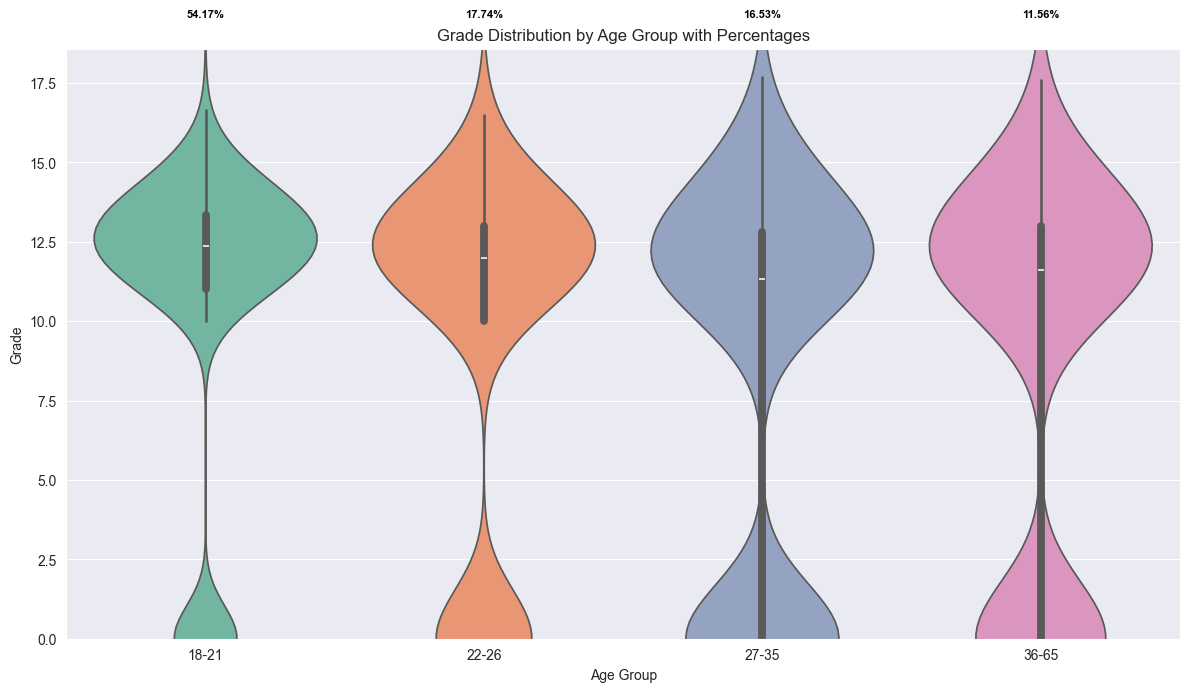

In [10]:
df['Age Group'] = pd.cut(df['Age at enrollment'], bins=[18, 21, 26, 35, 65], labels=['18-21', '22-26', '27-35', '36-65'])

plt.figure(figsize=(12, 7))
sns.violinplot(x="Age Group", y="Curricular units 2nd sem (grade)", data=df, palette="Set2", hue="Age Group", legend=False)
age_group_counts = df['Age Group'].value_counts(normalize=True) * 100

max_grade = df["Curricular units 2nd sem (grade)"].max()
for i, age_group in enumerate(age_group_counts.index):
    plt.text(i, max_grade + 1, f'{age_group_counts[age_group]:.2f}%',
             horizontalalignment='center', size=8, color='black', weight='semibold')

plt.title("Grade Distribution by Age Group with Percentages")
plt.ylabel("Grade")
plt.ylim(df["Curricular units 2nd sem (grade)"].min(), max_grade)
plt.tight_layout()
plt.show()


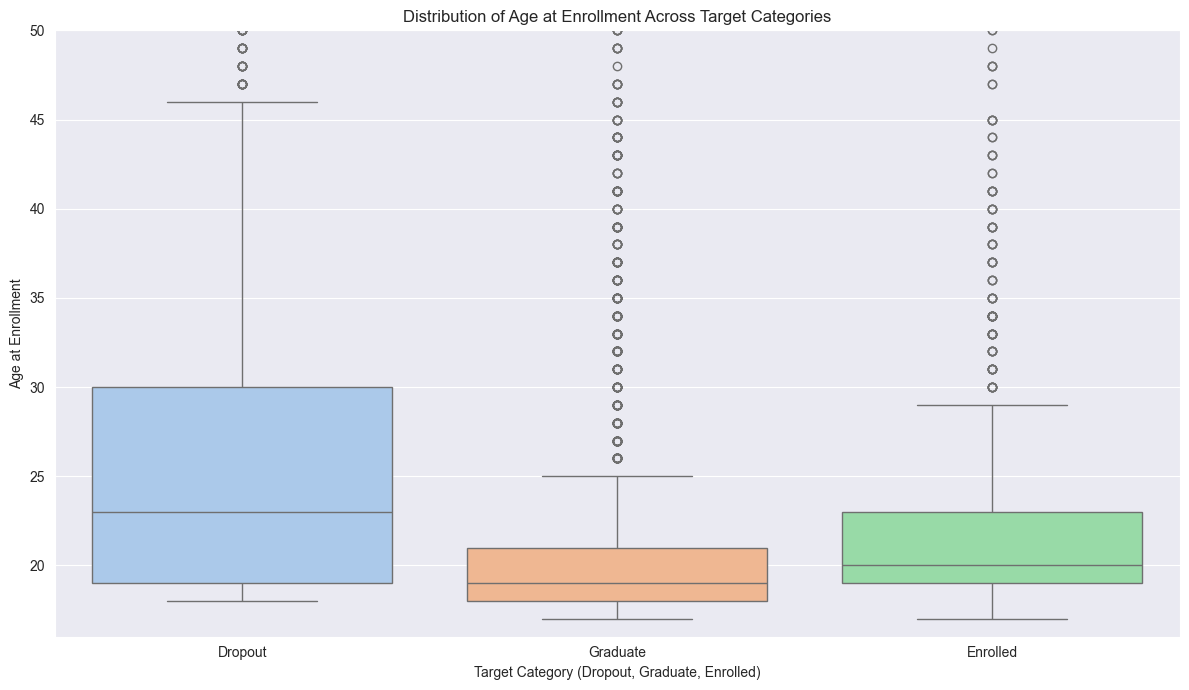

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Target", y="Age at enrollment", data=df, palette="pastel", hue="Target")
plt.title("Distribution of Age at Enrollment Across Target Categories")
plt.xlabel("Target Category (Dropout, Graduate, Enrolled)")
plt.ylabel("Age at Enrollment")
plt.ylim(16, 50)
plt.tight_layout()
plt.show()


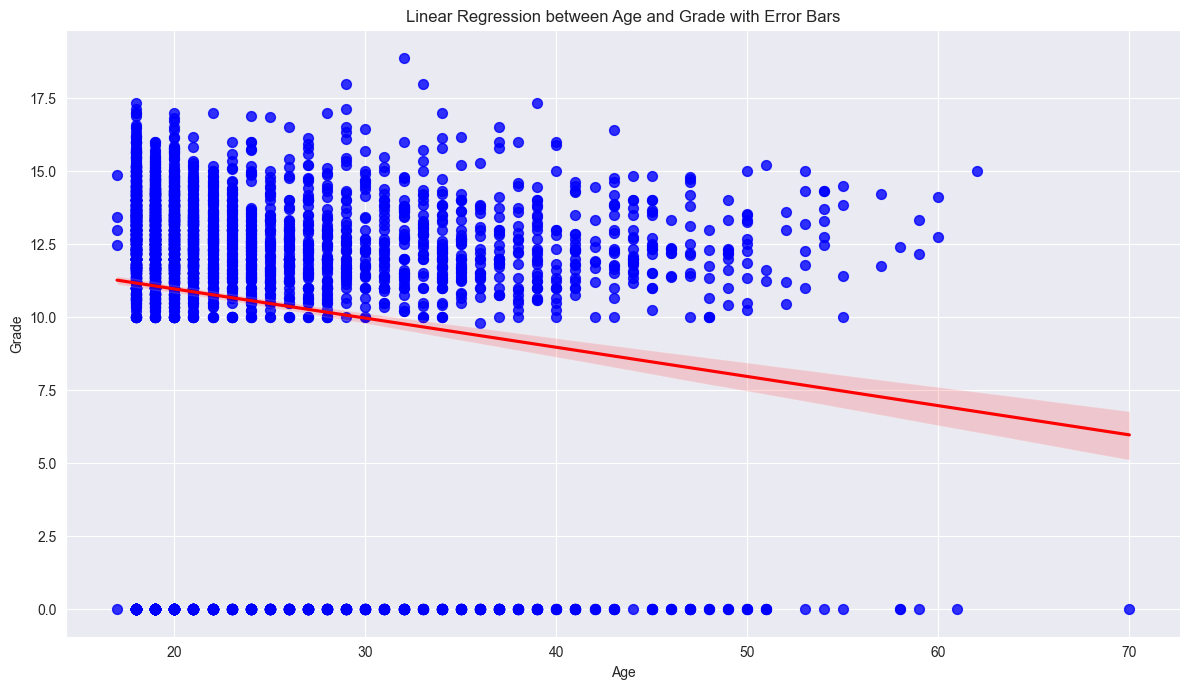

In [12]:
plt.figure(figsize=(12, 7))
sns.regplot(x="Age at enrollment", y="Curricular units 1st sem (grade)", data=df, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'}, ci=90)
plt.title("Linear Regression between Age and Grade with Error Bars")
plt.xlabel("Age")
plt.ylabel("Grade")

plt.tight_layout()
plt.show()


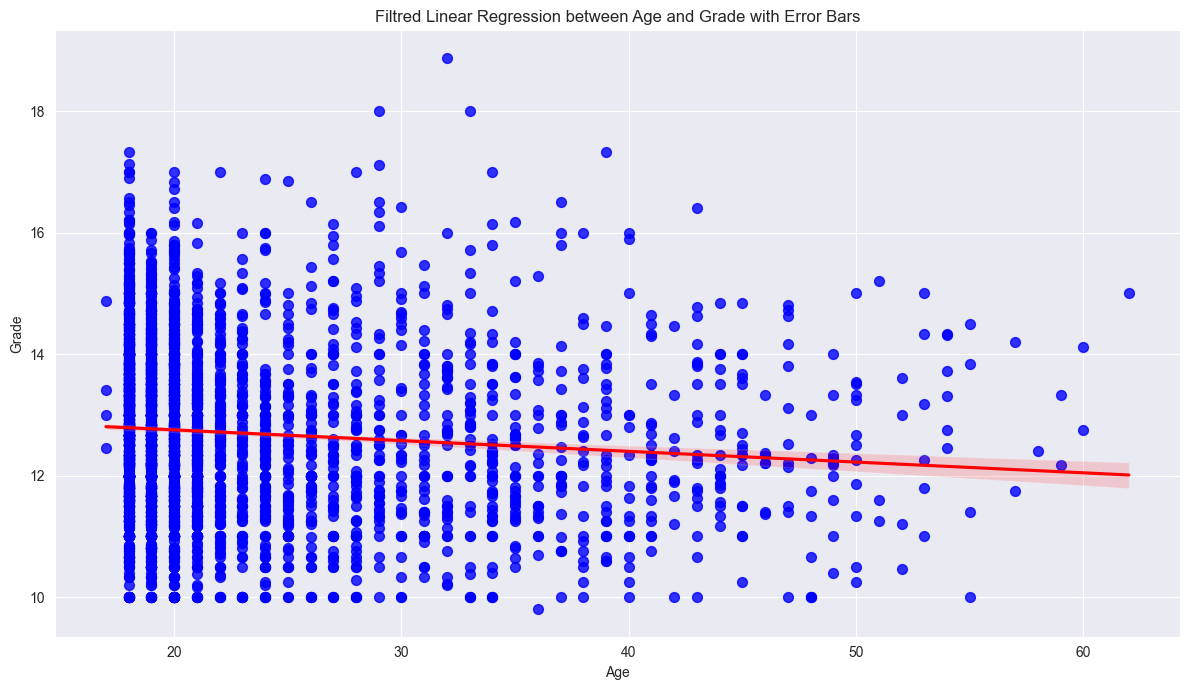

In [13]:
df["Filtred Grade"] = df["Curricular units 1st sem (grade)"].where(df["Curricular units 1st sem (grade)"] > 0)
plt.figure(figsize=(12, 7))

sns.regplot(x="Age at enrollment", y="Filtred Grade", data=df,  scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'}, ci=90)

plt.title("Filtred Linear Regression between Age and Grade with Error Bars")
plt.xlabel("Age")
plt.ylabel("Grade")

plt.tight_layout()
plt.show()


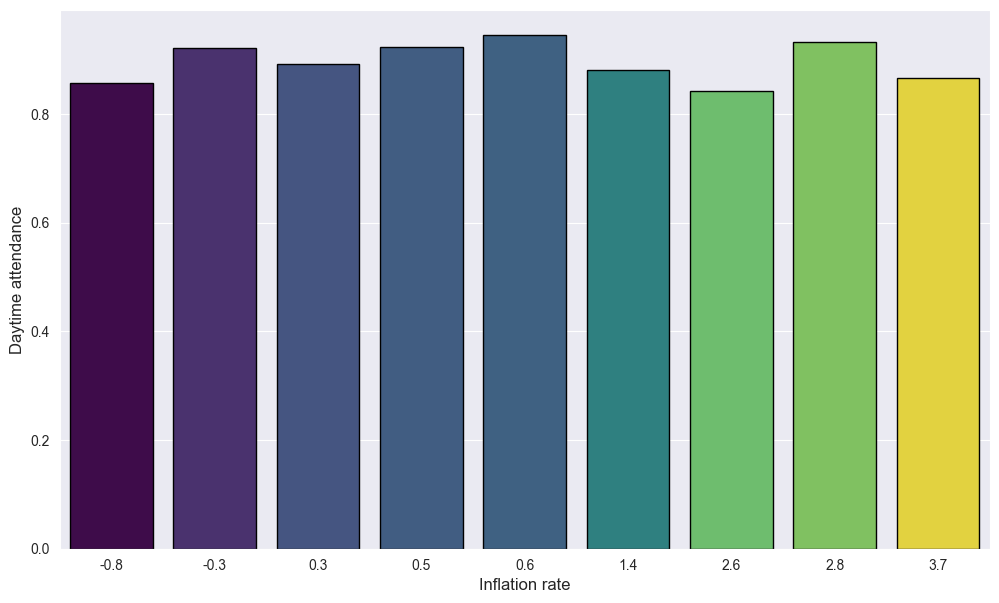

In [14]:
df_long = df.groupby('Inflation rate', as_index=False)['Daytime/evening attendance'].mean()
df_long.rename(columns={'Daytime/evening attendance': 'Mean'}, inplace=True)

plt.figure(figsize=(12, 7))
sns.barplot(data=df_long, x="Inflation rate", y="Mean", palette="viridis", edgecolor="black", hue="Inflation rate", legend=False)

plt.xlabel("Inflation rate", fontsize=12)
plt.ylabel("Daytime attendance", fontsize=12)
plt.show()

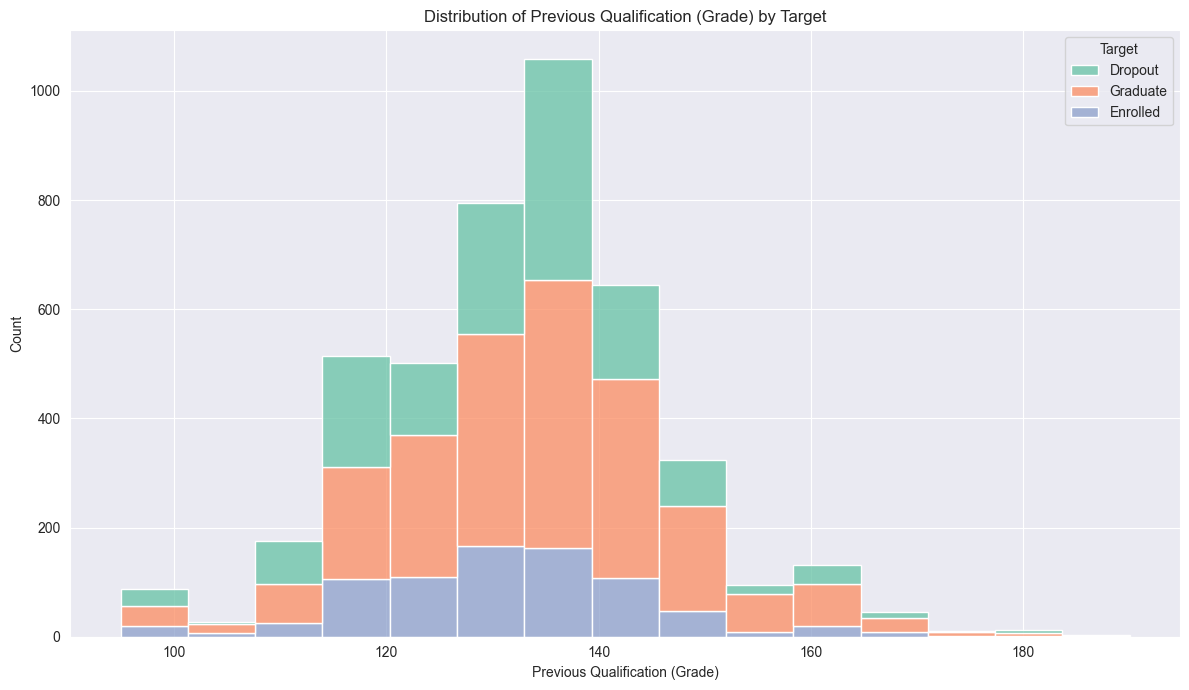

In [15]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x="Previous qualification (grade)", hue="Target", multiple="stack", bins=15, palette="Set2")
plt.title("Distribution of Previous Qualification (Grade) by Target")
plt.xlabel("Previous Qualification (Grade)")
plt.tight_layout()
plt.show()


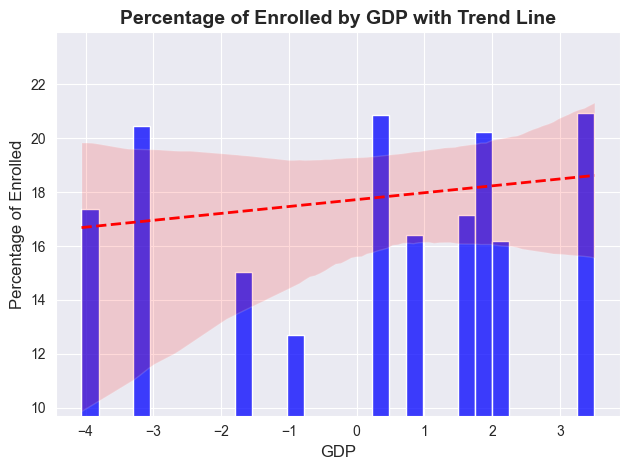

In [16]:
df_long = df.groupby('GDP')['Target'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
df_long = df_long.query("Target == 'Enrolled'").drop(columns='Target')
sns.histplot(data=df_long, x="GDP", weights="Percentage", color="blue", bins=30)
sns.regplot(data=df_long, x=df_long["GDP"].astype(float), y="Percentage", scatter=False, color="red", ci=95, line_kws={'linewidth': 2, 'linestyle': '--'})

plt.xlabel("GDP", fontsize=12)
plt.ylabel("Percentage of Enrolled", fontsize=12)
plt.title("Percentage of Enrolled by GDP with Trend Line", fontsize=14, fontweight='bold')
plt.ylim(df_long["Percentage"].min() - 3, df_long["Percentage"].max() + 3)
plt.tight_layout()
plt.show()


In [17]:
df['Target encoded'] = df['Target'].apply(lambda x: 1 if x == 'Graduate' else (-1 if x == 'Dropout' else None))
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
corr_pairs = correlation_matrix.unstack().reset_index(name="Correlation")
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs_sorted = corr_pairs.sort_values(by='Correlation', ascending=False)
a = ""

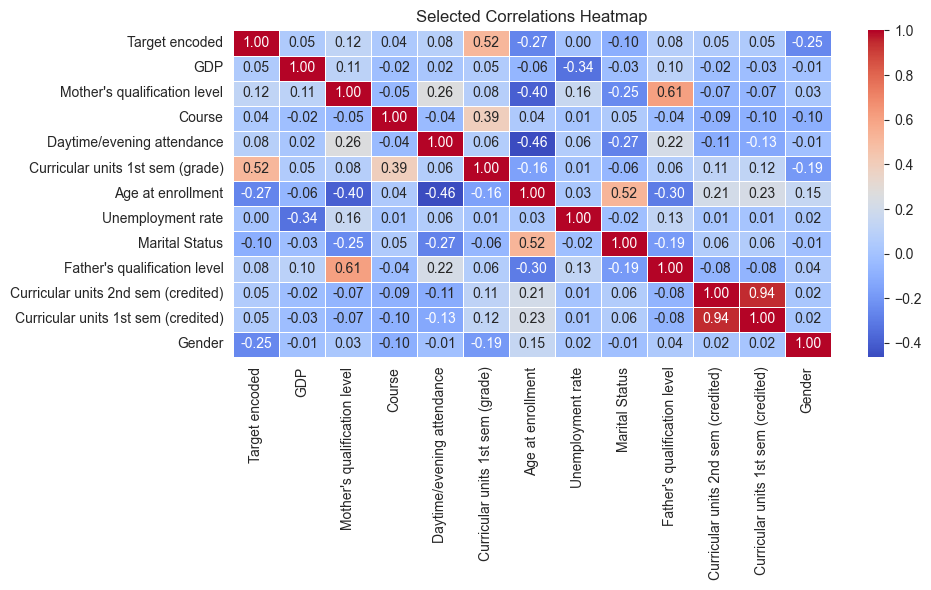

In [18]:
keys = ['Target encoded', 'GDP', "Mother's qualification level", 'Course', 'Daytime/evening attendance', 'Curricular units 1st sem (grade)', 'Age at enrollment', 'Unemployment rate', 'Marital Status', "Father's qualification level", 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)', 'Gender']

filtered_corr_matrix = correlation_matrix.loc[keys, keys]

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Selected Correlations Heatmap")
plt.tight_layout()
plt.show()


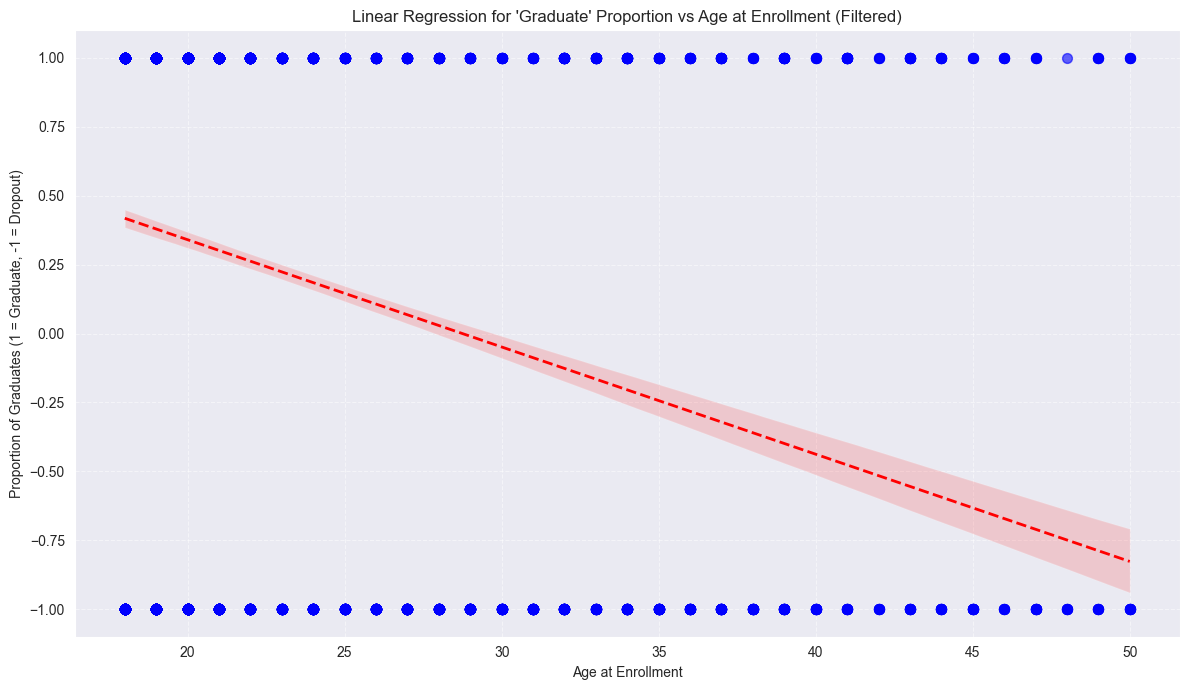

In [22]:
age_counts = df['Age at enrollment'].value_counts()
valid_ages = age_counts[age_counts > 10].index
df_filtered = df[df['Age at enrollment'].isin(valid_ages)]
plt.figure(figsize=(12, 7))
sns.regplot(x="Age at enrollment", y="Target encoded", data=df_filtered,
            scatter_kws={'s': 50, 'color': 'blue', 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'}, ci=90)

plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Linear Regression for 'Graduate' Proportion vs Age at Enrollment (Filtered)")
plt.xlabel("Age at Enrollment")
plt.ylabel("Proportion of Graduates (1 = Graduate, -1 = Dropout)")
plt.tight_layout()
plt.show()


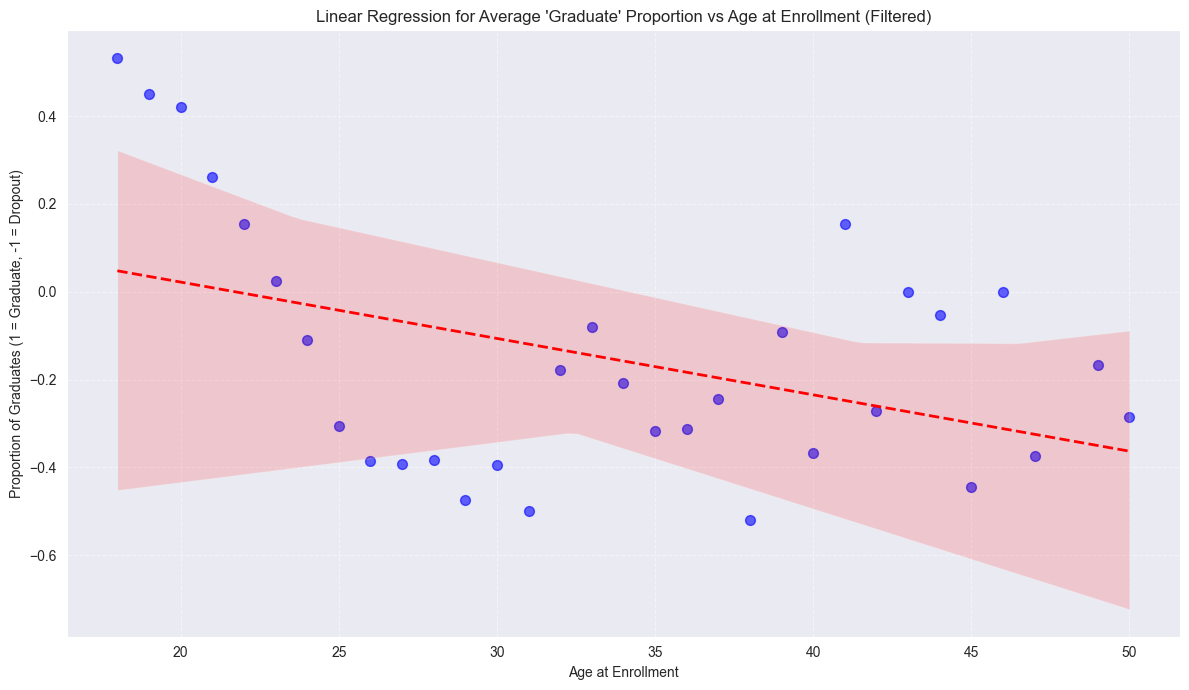

In [24]:
df_cleaned = df.dropna(subset=['Target encoded'])

age_group_stats = df_cleaned.groupby('Age at enrollment').agg(
    count=('Target encoded', 'size'),
    mean=('Target encoded', 'mean')
).reset_index()

age_group_filtered = age_group_stats[age_group_stats['count'] > 10]

plt.figure(figsize=(12, 7))
sns.regplot(x="Age at enrollment", y="mean", data=age_group_filtered,scatter_kws={'s': 50, 'color': 'blue', 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'}, ci=90)

plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Linear Regression for Average 'Graduate' Proportion vs Age at Enrollment (Filtered)")
plt.xlabel("Age at Enrollment")
plt.ylabel("Proportion of Graduates (1 = Graduate, -1 = Dropout)")
plt.tight_layout()
plt.show()

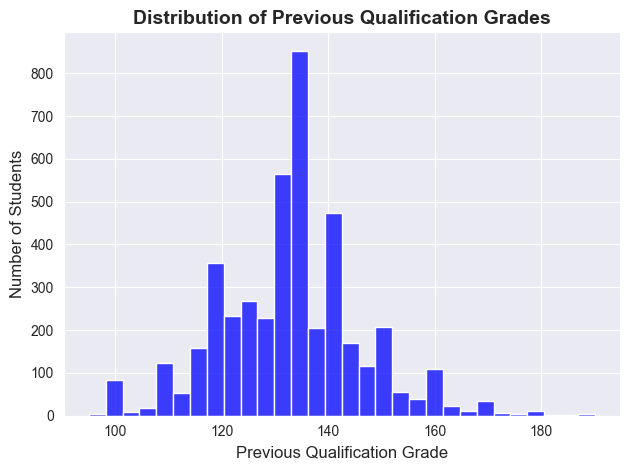

In [23]:
sns.histplot(data=df, x="Previous qualification (grade)", color="blue", bins=30)


plt.title("Distribution of Previous Qualification Grades", fontsize=14, fontweight='bold')
plt.xlabel("Previous Qualification Grade", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)

plt.tight_layout()
plt.show()

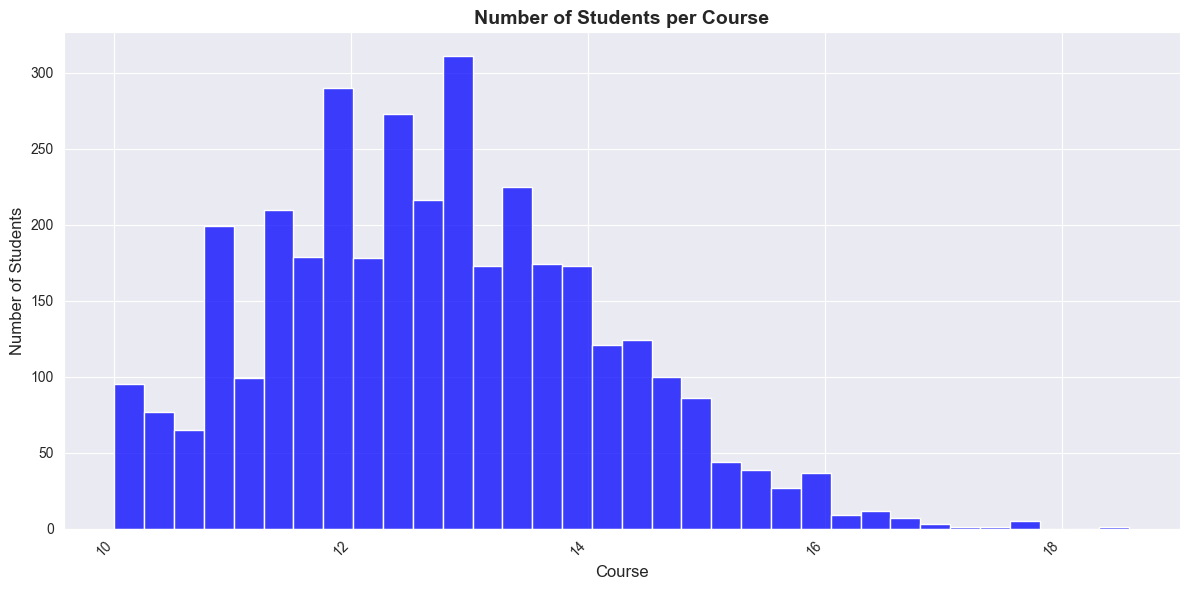

In [46]:
df_filtered = df.loc[df['Curricular units 2nd sem (grade)'] > 5]

plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x="Curricular units 2nd sem (grade)", color="blue")

plt.title("Number of Students per Course", fontsize=14, fontweight='bold')
plt.xlabel("Course", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

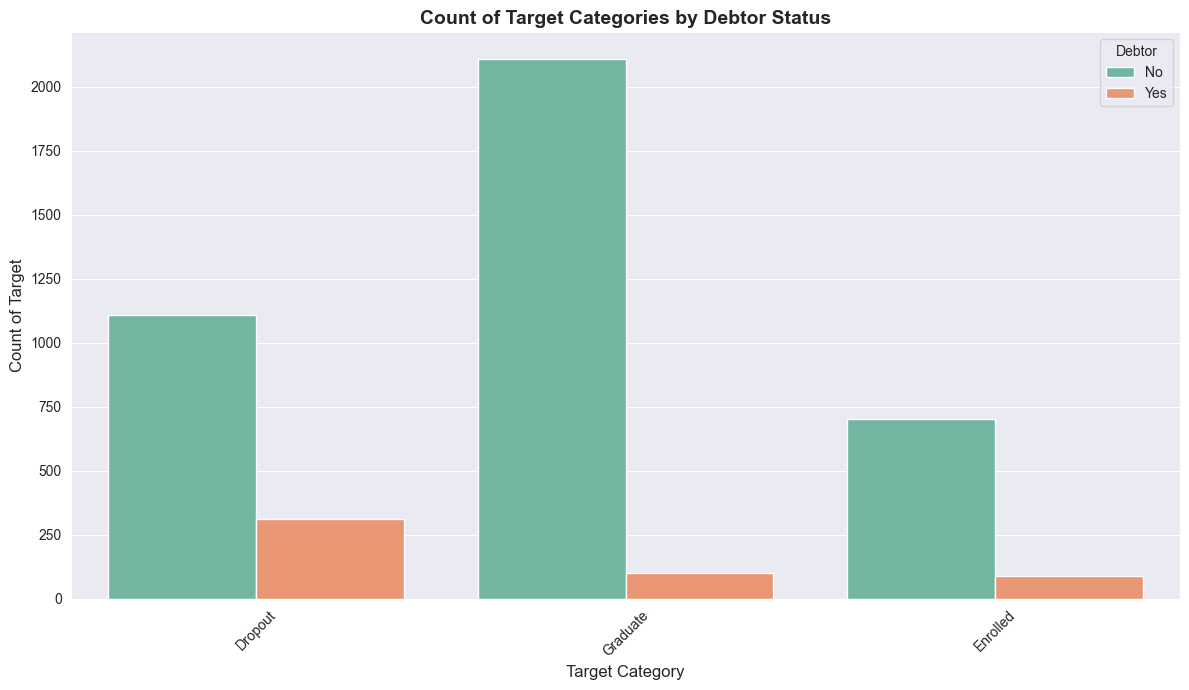

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(x="Target", data=df, palette="Set2", hue="Debtor")

plt.title("Count of Target Categories by Debtor Status", fontsize=14, fontweight="bold")
plt.xlabel("Target Category", fontsize=12)
plt.ylabel("Count of Target", fontsize=12)
legend_labels = ["No" if text == "0" else "Yes" for text in df["Debtor"].astype(str).unique()]
plt.legend(title="Debtor", labels=legend_labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
